# COMP 455

# Lab 3: Clustering



In [60]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans    # for k-means clustering
from scipy.cluster import hierarchy   # for hierarchical clustering

from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('seaborn-white')

# Clustering

We will look first at k-means clustering and then at hierarchical clustering.

### K-Means Clustering

We will read in some sample data. This dataset was randomly generated by drawing values from a Normal distribution and then adjusting them. There are two variables (X1 and X2) and 50 observations/instances.

We also scale the data to make sure the variables are generally in the same range.

In [61]:
df = pd.read_csv('sample-data.csv')
df = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
df.head()

,X1,X2
0,0.820207,-0.962510
1,-0.200960,-0.201804
2,0.002604,-1.314710
3,1.366376,-1.495652
4,0.439404,-1.344868


Let's first plot the data before we cluster it. Does it seem to cluster into groups? If so, how many?

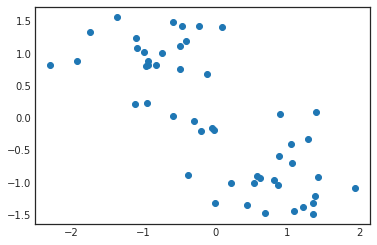

In [62]:
plt.figure()
plt.scatter(df['X1'], df['X2'])
plt.show()

#### First we will try K-means with K = 2

In [63]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(df)

KMeans(n_clusters=2, n_init=20)

In [64]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

#### Now we will try K = 3

In [17]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(df)

KMeans(n_clusters=3, n_init=20)

In [18]:
pd.Series(km2.labels_).value_counts()

0    22
1    19
2     9
dtype: int64

In [19]:
km2.cluster_centers_

array([[ 0.96298071, -0.9403892 ],
       [-0.91951001,  1.10703342],
       [-0.41276504, -0.03834138]])

In [20]:
km2.labels_

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2], dtype=int32)

In [21]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

19.24738218137461

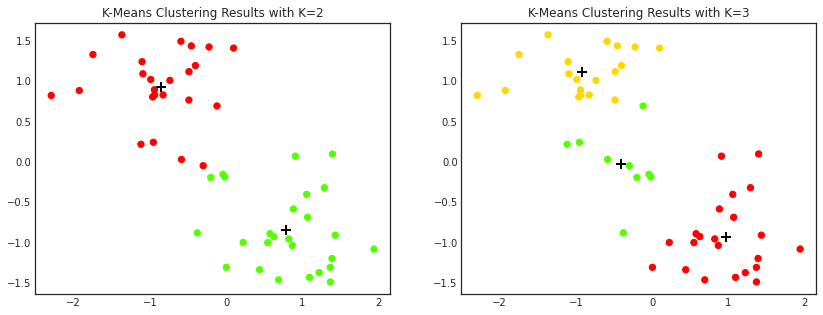

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(df['X1'], df['X2'], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(df['X1'], df['X2'], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### Hierarchical Clustering

For hierarchical clustering, we will use scipy instead of sklearn.

We will try three types of linkages. 

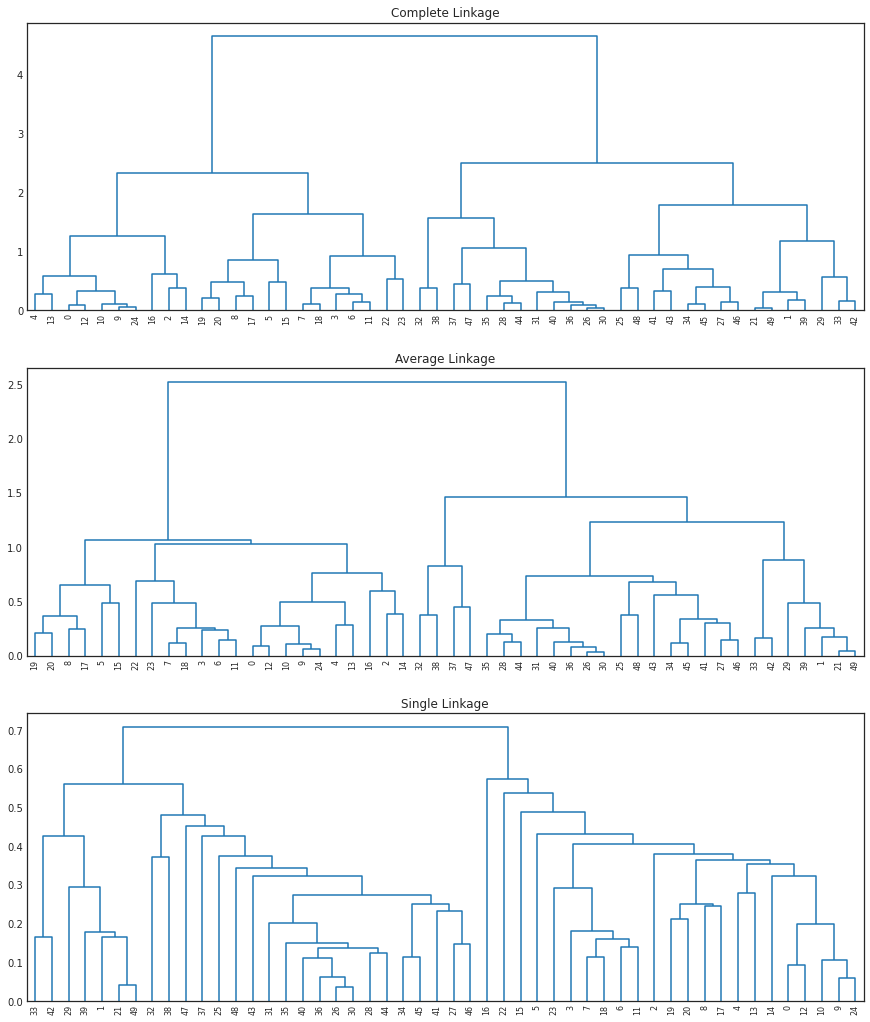

In [23]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(df), hierarchy.average(df), hierarchy.single(df)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

We can get cluster assignments by cutting the tree. A strength of hierarchical clustering is that we can choose different numbers of clusters from the tree. Here we show cluster assignments with two clusters and with three clusters. 

In [24]:
cuts = hierarchy.cut_tree(hierarchy.complete(df), n_clusters=[2,3])
print(cuts)

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]]


# Lab Assignment

## Clustering Car Seat Sales Data

You will now carry out k-means clustering on a dataset about the sales of car seats. Carry out the following steps. 
* Use just the features 'Sales' and 'Income' from the data in Carseats.csv (this step is done for you).
* Scale the features. 
* Create a scatterplot showing 'Sales' vs. 'Income.'
* Do K-Means clustering with k=2.
* Do K-Means clustering with k=3.
* Create two new scatterplots showing the clusterings with k=2 and k=3.

In [82]:
df = pd.read_csv("Carseats.csv")
print(df.head())

X = df[['Sales', 'Income']]
print(X.head())


   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  
   Sales  Income
0   9.50      73
1  11.22      48
2  10.06      35
3   7.40     100
4   4.15      64


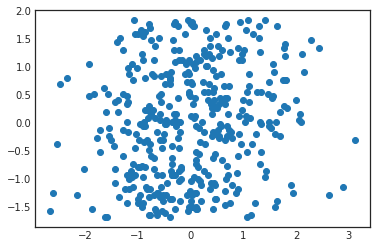

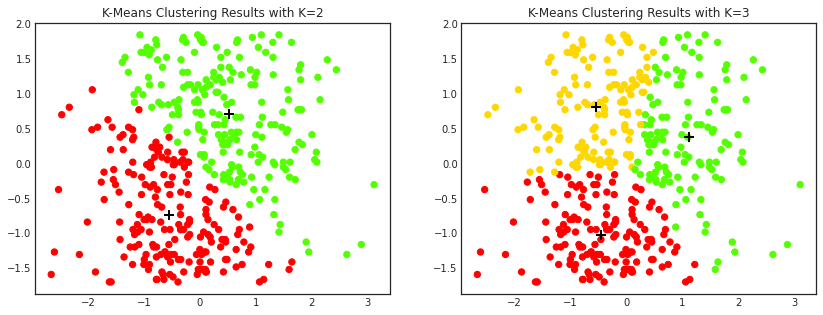

In [83]:
# your code here

df = pd.DataFrame(scale(X), index=X.index, columns=['Sales','Income'])

df.head()

plt.figure()
plt.scatter(df['Sales'], df['Income'])
plt.show()

km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(df)
km1.labels_

np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(df)
pd.Series(km2.labels_).value_counts()
km2.cluster_centers_
km2.labels_
km2.inertia_

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(df['Sales'], df['Income'], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(df['Sales'], df['Income'], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

__Submit your completed notebook via Blackboard.__

Extra (not required): If you finish the k-means clustering early, try hierarchical clustering on the same dataset.